In [1]:
''' make sure to install these dependencies (python3 pip install ... ; or python3 -m pip install ...) '''
import pandas as pd
import numpy as np
# import math
import matplotlib.pyplot as plt

In [2]:
airTraffic_df = pd.read_csv("data/air_traffic.csv")
avgFare_df = pd.read_csv("data/quarterly_avg_air_fare.csv")
carriers_df = pd.read_csv("data/carriers_routes.csv")
faresByCity_df = pd.read_csv("data/city_pair_fares.csv")

In [3]:
airTraffic_df.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07


In [4]:
carriers_df.head()
# carriers_df['UNIQUE_CARRIER']
# carriers_df['DEST_CITY_NAME']


,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,...,DEST,DEST_CITY_NAME,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
0,0.0,0.0,0.0,19.0,KAH,20272,Kenmore Air Harbor,06927,D,KAH,...,YWH,"Victoria, Canada",CA,Canada,906,2024,2,6,1,L
1,0.0,0.0,0.0,45.0,KAH,20272,Kenmore Air Harbor,06927,D,KAH,...,CXH,"Vancouver, Canada",CA,Canada,906,2024,2,4,1,L
2,0.0,0.0,0.0,47.0,KAH,20272,Kenmore Air Harbor,06927,D,KAH,...,FRD,"Friday Harbor, WA",US,United States,93,2024,2,5,1,L
3,0.0,0.0,0.0,53.0,KAH,20272,Kenmore Air Harbor,06927,D,KAH,...,FBS,"Friday Harbor, WA",US,United States,93,2024,2,5,1,L
4,0.0,0.0,0.0,60.0,KAH,20272,Kenmore Air Harbor,06927,D,KAH,...,ZNA,"Nanaimo, Canada",CA,Canada,906,2024,2,6,1,F


In [5]:
faresByCity_df.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2009,2,32467,34576,"Miami, FL (Metropolitan Area)","Rochester, NY",1204,203,151.46,FL,0.29,131.05,FL,0.29,131.05,1,"Miami, FL (Metropolitan Area)\r\n(44.977479, -...","Rochester, NY\r\n(43.155708, -77.612547)"
1,2000,4,30397,33198,"Atlanta, GA (Metropolitan Area)","Kansas City, MO",692,782,172.83,DL,0.63,194.71,NJ,0.26,126.88,1,"Atlanta, GA (Metropolitan Area)\r\n(33.748547,...","Kansas City, MO\r\n(39.099792, -94.578559)"
2,2007,4,32575,34614,"Los Angeles, CA (Metropolitan Area)","Salt Lake City, UT",590,3122,135.24,DL,0.51,144.28,B6,0.15,111.68,1,"Los Angeles, CA (Metropolitan Area)\r\n(34.052...","Salt Lake City, UT\r\n(40.758478, -111.888142)"
3,2004,4,32337,31650,"Indianapolis, IN","Minneapolis/St. Paul, MN",503,395,206.78,NW,0.74,224.77,TZ,0.11,156.74,1,"Indianapolis, IN\r\n(39.76845, -86.156212)","Minneapolis/St. Paul, MN\r\n(44.977479, -93.26..."
4,2008,4,30194,30559,"Dallas/Fort Worth, TX","Seattle, WA",1670,957,242.74,AA,0.47,262.43,AS,0.27,218.90,1,"Dallas/Fort Worth, TX\r\n(40.11086, -77.035636)","Seattle, WA\r\n(47.603229, -122.33028)"


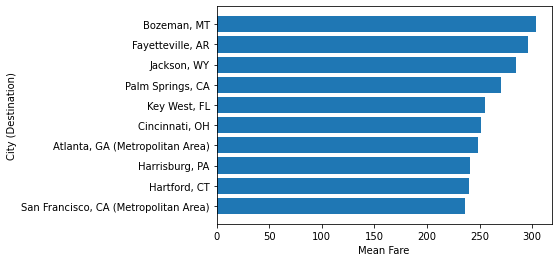

In [6]:
''' Chart 1: avg fare by dest. city '''
# Group, take avg. of fares by city. Sort by fare, asc. #
c1_df = faresByCity_df.groupby('city2')['fare'].mean()
c1_df_sorted = c1_df.sort_values().reset_index()

x = c1_df_sorted.tail(10)['city2']
y = c1_df_sorted.tail(10)['fare']

plt.barh(x,y)
plt.xlabel("Mean Fare")
plt.ylabel("City (Destination)")
plt.show()

In [10]:
''' Chart 2: Avg. fare by city, by quarter'''
def plot_quarterly_city_fares(faresByCity_df, top_n=5):
    """Plot quarterly fare trends for top N cities by average fare"""
    # Get top N most expensive cities
    top_cities = faresByCity_df.groupby('city2')['fare'].mean().nlargest(top_n).index
    
    # Filter data for top cities
    top_cities_data = faresByCity_df[faresByCity_df['city2'].isin(top_cities)]
    
    # Calculate quarterly averages for each city
    quarterly_avg = top_cities_data.groupby(['Year', 'quarter', 'city2'])['fare'].mean().reset_index()
    
    # Create the plot
    plt.figure(figsize=(15, 8))
    
    for city in top_cities:
        city_data = quarterly_avg[quarterly_avg['city2'] == city]
        plt.plot(range(len(city_data)), city_data['fare'], label=city, marker='o')
    
    plt.xlabel('Time Period (Year-Quarter)')
    plt.ylabel('Average Fare ($)')
    plt.title(f'Quarterly Fare Trends for Top {top_n} Most Expensive Cities')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Create custom x-axis labels
    tick_labels = [f"{year}-Q{quarter}" for year, quarter 
                  in zip(quarterly_avg['Year'].unique(), quarterly_avg['quarter'].unique())]
    plt.xticks(range(len(tick_labels)), tick_labels, rotation=45)
    
    plt.tight_layout()
    plt.show()
plot_carrier_quarterly_fares(faresByCity_df)

In [8]:
'''Chart 3: avg fair by carrier, by quarter'''

'Chart 3: avg fair by carrier, by quarter'